In [1]:
import os
import pandas as pd
import numpy as np

In [24]:
import crawl

In [2]:
# 데이터가 존재할 경우 CSV 파일을 읽어 DataFrame으로 변환
if os.path.exists('./crawled_data.csv'):
    # CSV 파일을 읽어 DataFrame으로 변환
    with open('./crawled_data.csv', 'r', encoding='utf-8') as f:
        contents = pd.read_csv(f)

In [3]:
contents['content'][0]

'오늘 아이돌봄 서비스를 처음 이용했습니다오후6시에서 오후9시까지 봐주셨습니다\u200b여아 5세아이 6시하원도와주시고 집에서 저녁식사 챙겨주셨어요아이 식사도 챙겨주시고 같이 그림도 그려주신게 너무 좋았는데요퇴근후 집에서 뵐때 아이 밥 차려주면서 본인 저녁식사도 같이 하셨다고 하시더라구요\u200b미리 말안해주셔서 살짝 당황스럽긴 했는데요  돌봄 선생님 말로는 원래 다 그렇게 같이 차려먹는다고 하시고 간식이나 과일도 같이 먹는다고 하시네요다른 카페글은 각자 챙겨오신다고 하네요..\u200b고기나 야채 사두면 알아서 국이나 반찬 요리해서 아이랑 먹겠다고 하시는데 원래 이렇게 진행되는게 맞을까요?\u200b다른 돌봄 선생님들도 다 똑같다고 하셔서..혹시 선배맘님들 아이돌봄 서비스 이용하실때 어떻게 이용하세요? 궁금합니당 ㅠㅠ\u200b\u200b\u200b\u200b\u200b\u200b\u200b🧡천안.아산의 모든정보와 살아가는 이야기가 모여있는 온라인 커뮤니티 [천안아산줌마렐라]'

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import re

def okt_func(df, tag):
    # 크롤링한 전체 글 모음
    texts = df[tag].tolist()

    # None/NaN 제거 + 전부 str 타입으로 변환
    texts = [str(t) for t in texts if pd.notnull(t)]

    text = ' '.join(texts)

    # 간단한 정제 (이모지/특수문자 제거)
    text = re.sub(r'[^가-힣\s]', '', text)

    # 형태소 분석
    okt = Okt()
    nouns = okt.nouns(text)

    # 필터링 한 글자 제외
    filtered = [word for word in nouns if len(word) > 1]

    # 단어 빈도수 계산
    word_count = Counter(filtered)
    
    # 가장 많이 관측되는 단어 50개 출력
    top_words = word_count.most_common(50)
    
    # 계산된 단어 빈도수 DataFrame화
    word_df = pd.DataFrame(word_count.items(), columns=['word', 'count'])

    # 출력
    for word, freq in top_words:
        print(f'[{word}] : {freq}회')

    return word_df

In [14]:
content_df = okt_func(contents, 'content')

[서비스] : 1188회
[아이] : 725회
[아이돌] : 596회
[신청] : 531회
[이용] : 495회
[시간] : 387회
[지원] : 379회
[정부] : 275회
[선생님] : 273회
[가정] : 261회
[센터] : 219회
[아동] : 178회
[어린이집] : 159회
[소득] : 159회
[개월] : 155회
[기준] : 127회
[가족] : 125회
[경우] : 118회
[부모] : 117회
[보미] : 114회
[맞벌이] : 111회
[정도] : 106회
[대상] : 104회
[이하] : 103회
[시간제] : 102회
[둘째] : 102회
[부담] : 99회
[하원] : 94회
[기관] : 91회
[아기] : 91회
[첫째] : 89회
[제공] : 85회
[대기] : 80회
[사업] : 79회
[양육] : 74회
[장애] : 72회
[혹시] : 71회
[확인] : 71회
[보육] : 70회
[가구] : 69회
[자녀] : 69회
[공백] : 66회
[유형] : 66회
[지금] : 66회
[내용] : 65회
[기간] : 64회
[만원] : 63회
[일제] : 61회
[한부모] : 60회
[남편] : 60회


In [15]:
title_df = okt_func(contents, 'title')

[서비스] : 455회
[아이돌] : 433회
[이용] : 90회
[지원] : 44회
[아이] : 39회
[정부] : 33회
[신청] : 32회
[신분] : 29회
[질문] : 19회
[문의] : 17회
[센터] : 16회
[시간] : 16회
[선생님] : 15회
[안내] : 15회
[어린이집] : 14회
[가족] : 12회
[가정] : 11회
[도우미] : 10회
[대기] : 9회
[시간제] : 8회
[파주시] : 8회
[아시] : 8회
[자녀] : 8회
[소득] : 8회
[기관] : 7회
[제로] : 7회
[공모전] : 7회
[확대] : 7회
[아동] : 7회
[사용] : 7회
[취소] : 7회
[방법] : 6회
[제공] : 6회
[시급] : 6회
[확정] : 6회
[인부] : 6회
[수기] : 6회
[등원] : 6회
[개월] : 6회
[관련] : 6회
[아기] : 6회
[가요] : 6회
[캐릭터] : 5회
[기준] : 5회
[일제] : 5회
[비용] : 5회
[부모] : 5회
[하원] : 5회
[맞벌이] : 5회
[재판정] : 5회


In [16]:
reply_df = okt_func(contents, 'reply')

[신청] : 121회
[선생님] : 90회
[아이] : 81회
[시간] : 77회
[서비스] : 75회
[이용] : 72회
[댓글] : 72회
[센터] : 55회
[아이돌] : 41회
[대기] : 40회
[지원] : 33회
[어린이집] : 32회
[정부] : 29회
[매칭] : 27회
[소득] : 24회
[연락] : 22회
[상담] : 20회
[정보] : 20회
[배정] : 20회
[주민] : 19회
[개월] : 19회
[하원] : 18회
[판정] : 17회
[지역] : 17회
[문의] : 17회
[지금] : 16회
[아기] : 16회
[맞벌이] : 16회
[둘째] : 16회
[시간대] : 16회
[시간제] : 16회
[바로] : 15회
[정기] : 15회
[생각] : 13회
[등급] : 13회
[저희] : 13회
[기준] : 13회
[자녀] : 13회
[등원] : 12회
[동사무소] : 12회
[경우] : 12회
[유형] : 12회
[준비] : 11회
[는걸] : 11회
[먼저] : 11회
[정말] : 11회
[시작] : 11회
[사용] : 11회
[전화] : 11회
[달라] : 11회


In [17]:
df_lst = [content_df, title_df, reply_df]

for df in df_lst:
    display(df)

,word,count
0,오늘,35
1,아이돌,596
2,서비스,1188
3,처음,31
4,이용,495
...,...,...
3160,개월여,1
3161,임산부,1
3162,중도,1
3163,한가지,1


,word,count
0,아이돌,433
1,서비스,455
2,선생님,15
3,정부,33
4,아침밥,2
...,...,...
424,스토리,1
425,인증샷,1
426,이벤트,1
427,대가,1


,word,count
0,닉네임,3
1,규정,1
2,변경,8
3,다미,1
4,통보,1
...,...,...
1047,재원,1
1048,보육료,1
1049,전환,1
1050,감염,1


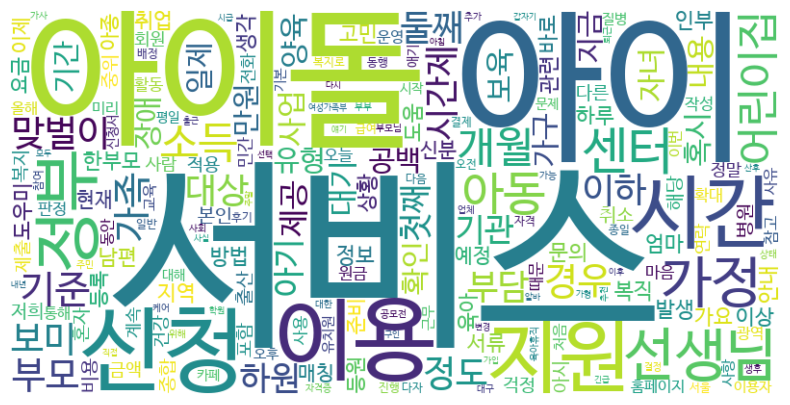

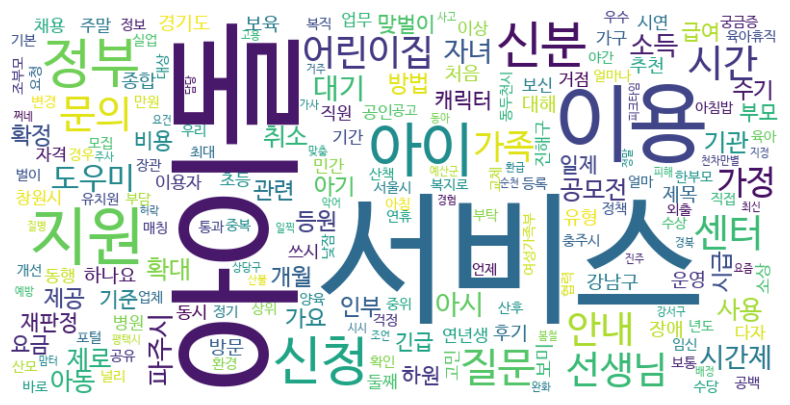

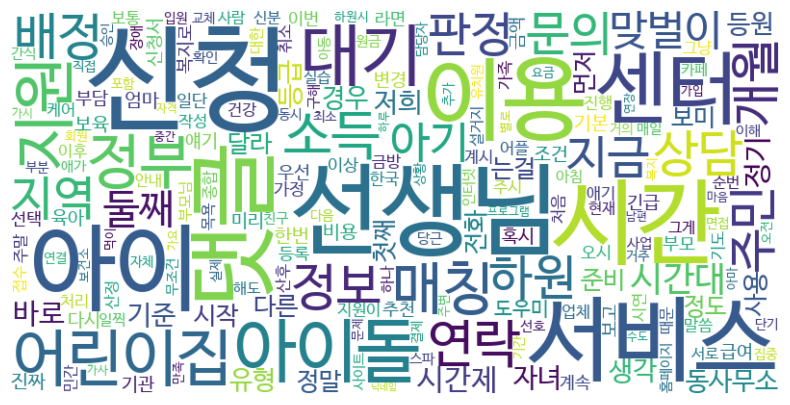

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# ✅ 1. 폰트 경로 설정 (NanumBarunGothic 기준)
# font_path = fm.findfont('NanumBarunGothic')  # 시스템에 설치된 폰트 자동 탐색
# 또는 수동 지정 예시:
font_path = 'C:/Windows/Fonts/NanumBarunGothic.ttf'

# ✅ 2. matplotlib에도 한글 폰트 설정 (혹시 모를 깨짐 방지)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

for df in df_lst:
    # 워드 클라우드 생성
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(df['word'], df['count'])))

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()